У нас есть еще один вопрос, на который вам нужно ответить: когда наши пользователи обычно выполняют лабораторные работы: ночью, утром, днем ​​или вечером? И как это изменилось со временем?

In [14]:
import pandas as pd
import sqlite3

In [15]:
db = sqlite3.connect('../data/checking-logs.sqlite')

In [16]:
query = """
SELECT *
FROM checker
WHERE uid LIKE 'user_%';
"""
df = pd.io.sql.read_sql(query, db, parse_dates=['timestamp'])
df

,index,status,success,timestamp,numTrials,labname,uid
0,7,ready,0,2020-04-17 05:19:02.744528,1,project1,user_4
1,8,checking,0,2020-04-17 05:22:35.249331,2,project1,user_4
2,9,ready,1,2020-04-17 05:22:45.549397,2,project1,user_4
3,10,checking,1,2020-04-17 05:34:14.691200,3,project1,user_4
4,11,ready,1,2020-04-17 05:34:24.422370,3,project1,user_4
...,...,...,...,...,...,...,...
3202,3397,ready,0,2020-05-21 20:19:06.872761,7,laba06s,user_1
3203,3398,checking,0,2020-05-21 20:22:41.785725,8,laba06s,user_1
3204,3399,ready,0,2020-05-21 20:22:41.877806,8,laba06s,user_1
3205,3400,checking,0,2020-05-21 20:37:00.129678,9,laba06s,user_1


1. анализировать только пользователей, а не администраторов
2. размер шрифта и размер фигуры остались прежними
3. ночь с 0:00:00 до 03:59:59, утро с 04:00:00 до 09:59:59, день с 10:00:00 до 16:59:59, вечер с 17:00:00 до 23:59:59
4. выберите палитру, которая вам действительно нравится, вам не обязательно копировать ее из графика выше

In [17]:
df['hour'] = (df['timestamp']).dt.hour

In [18]:
# df['hour'] = pd.DatetimeIndex(df['timestamp']).hour

In [19]:
time_bins=[-1, 4, 10, 17, 24]
labels=['night', 'morning', 'afternoon','evening']
df['time'] = pd.cut(df['hour'],
                      bins=time_bins,
                      labels=labels)
df['date'] = pd.to_datetime(df['timestamp']).dt.date
df

,index,status,success,timestamp,numTrials,labname,uid,hour,time,date
0,7,ready,0,2020-04-17 05:19:02.744528,1,project1,user_4,5,morning,2020-04-17
1,8,checking,0,2020-04-17 05:22:35.249331,2,project1,user_4,5,morning,2020-04-17
2,9,ready,1,2020-04-17 05:22:45.549397,2,project1,user_4,5,morning,2020-04-17
3,10,checking,1,2020-04-17 05:34:14.691200,3,project1,user_4,5,morning,2020-04-17
4,11,ready,1,2020-04-17 05:34:24.422370,3,project1,user_4,5,morning,2020-04-17
...,...,...,...,...,...,...,...,...,...,...
3202,3397,ready,0,2020-05-21 20:19:06.872761,7,laba06s,user_1,20,evening,2020-05-21
3203,3398,checking,0,2020-05-21 20:22:41.785725,8,laba06s,user_1,20,evening,2020-05-21
3204,3399,ready,0,2020-05-21 20:22:41.877806,8,laba06s,user_1,20,evening,2020-05-21
3205,3400,checking,0,2020-05-21 20:37:00.129678,9,laba06s,user_1,20,evening,2020-05-21


In [20]:
commits_group = df.groupby('time').date.size().reset_index()
commits_group

/tmp/ipykernel_80564/315796813.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  commits_group = df.groupby('time').date.size().reset_index()


,time,date
0,night,21
1,morning,344
2,afternoon,1473
3,evening,1369


In [21]:
# commits_group = df.groupby(by=['date', 'time']).agg({'time' : ['count']})
# commits_group

метод DataFrame.unstack(): (обратная операция DataFrame.stack()) "сводит" уровень индекса строки (возможно, иерархический) к оси столбца, создавая измененный DataFrame с новым, самым внутренним уровнем меток столбцов.

In [22]:
commits_group = df.groupby('time').date.value_counts().unstack(0)
commits_group

/tmp/ipykernel_80564/377640181.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  commits_group = df.groupby('time').date.value_counts().unstack(0)


time,night,morning,afternoon,evening
date,,,,
2020-04-17,0,13,10,0
2020-04-18,0,1,40,28
2020-04-19,2,11,9,11
2020-04-20,0,0,15,10
2020-04-21,0,0,9,16
2020-04-22,0,0,4,24
2020-04-23,2,6,15,20
2020-04-24,0,2,12,2
2020-04-25,1,21,48,34


<Axes: title={'center': 'Commits per day'}, xlabel='date'>

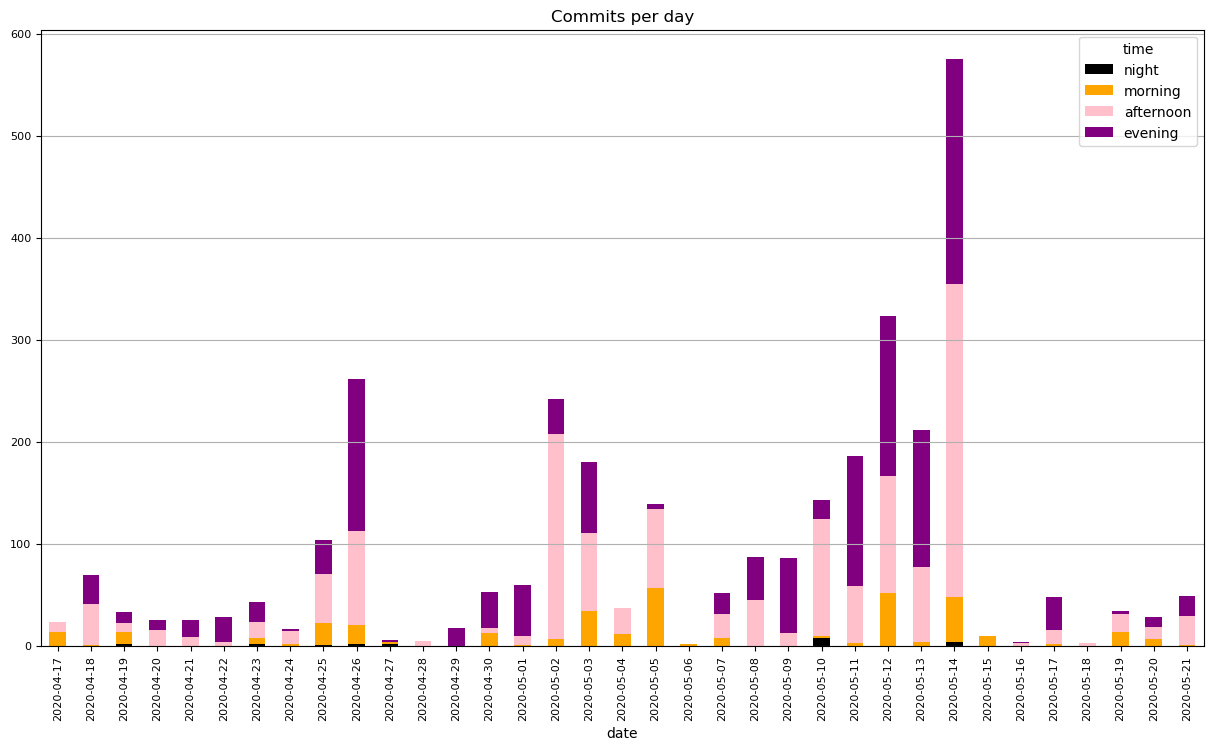

In [23]:
plt = commits_group.plot.bar(fontsize=8, figsize=(15, 8), 
                             title='Commits per day',
                            rot=90,
                            color=['black','orange','pink','purple'],
                            stacked=True)
                                         
plt.grid(axis='y')
plt

В конце вашего Jupyter Notebook создайте ячейку Markdown и вставьте вопросы:
«Когда наши пользователи обычно выполняют лабораторные работы: ночью, утром, днем ​​или вечером?» — ответом являются два наиболее распространенных периода.

Ответ: день и вечер

В какой день:
наибольшее количество коммитов
и в то же время количество коммитов вечером больше, чем днем?


In [24]:
commits_group[commits_group['evening'] > commits_group['afternoon']].sum(1).idxmax()

datetime.date(2020, 5, 12)

Ответ:  5.12.2020

In [25]:
db.close()